<a href="https://colab.research.google.com/github/rahulrkumar9000/Datascience/blob/master/Disease_Detection_using_X_Rays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
train_df= pd.read_csv("/content/drive/My Drive/new/nih/train-small.csv")

In [5]:
print(f"there are {train_df.shape[0]} rows and {train_df.shape[1]} columns in the data")

there are 1000 rows and 16 columns in the data


In [6]:
train_df.head()

,Image,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,PatientId,Pleural_Thickening,Pneumonia,Pneumothorax
0,00008270_015.png,0,0,0,0,0,0,0,0,0,0,0,8270,0,0,0
1,00029855_001.png,1,0,0,0,1,0,0,0,1,0,0,29855,0,0,0
2,00001297_000.png,0,0,0,0,0,0,0,0,0,0,0,1297,1,0,0
3,00012359_002.png,0,0,0,0,0,0,0,0,0,0,0,12359,0,0,0
4,00017951_001.png,0,0,0,0,0,0,0,0,1,0,0,17951,0,0,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [8]:
print(f"The total patient IDs are {train_df['PatientId'].count()},from those the unique Ids are {train_df['PatientId'].value_counts().shape[0]} ")

The total patient IDs are 1000,from those the unique Ids are 928 


In [0]:
column=train_df.columns
column=list(column)


In [10]:
column

['Image',
 'Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'PatientId',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [11]:
column.remove("Image")
column.remove("PatientId")
column


['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [12]:
for colum in column:
    print(f' {colum} has got {train_df[colum].sum()} cases')

 Atelectasis has got 106 cases
 Cardiomegaly has got 20 cases
 Consolidation has got 33 cases
 Edema has got 16 cases
 Effusion has got 128 cases
 Emphysema has got 13 cases
 Fibrosis has got 14 cases
 Hernia has got 2 cases
 Infiltration has got 175 cases
 Mass has got 45 cases
 Nodule has got 54 cases
 Pleural_Thickening has got 21 cases
 Pneumonia has got 10 cases
 Pneumothorax has got 38 cases


In [13]:
images= train_df['Image'].values
images

array(['00008270_015.png', '00029855_001.png', '00001297_000.png',
       '00012359_002.png', '00017951_001.png', '00001232_002.png',
       '00017135_000.png', '00027235_000.png', '00014197_007.png',
       '00011584_002.png', '00028208_026.png', '00015929_002.png',
       '00009911_001.png', '00026232_006.png', '00017417_004.png',
       '00012045_038.png', '00013710_000.png', '00005410_000.png',
       '00008515_006.png', '00028574_000.png', '00021441_000.png',
       '00010877_000.png', '00016030_004.png', '00012753_004.png',
       '00011315_001.png', '00020471_002.png', '00012966_000.png',
       '00012045_053.png', '00011579_036.png', '00020240_001.png',
       '00023309_030.png', '00021376_000.png', '00016719_029.png',
       '00016604_000.png', '00012615_000.png', '00026576_000.png',
       '00022572_028.png', '00008068_005.png', '00005759_014.png',
       '00027665_000.png', '00029047_000.png', '00009447_000.png',
       '00027900_000.png', '00017702_000.png', '00017126_000.p

In [14]:
random_images=[np.random.choice(images) for i in range(10)]
random_images

['00013670_149.png',
 '00000116_034.png',
 '00011850_004.png',
 '00019525_000.png',
 '00015572_006.png',
 '00019528_004.png',
 '00021449_007.png',
 '00004497_003.png',
 '00003028_027.png',
 '00026835_000.png']

Display random images


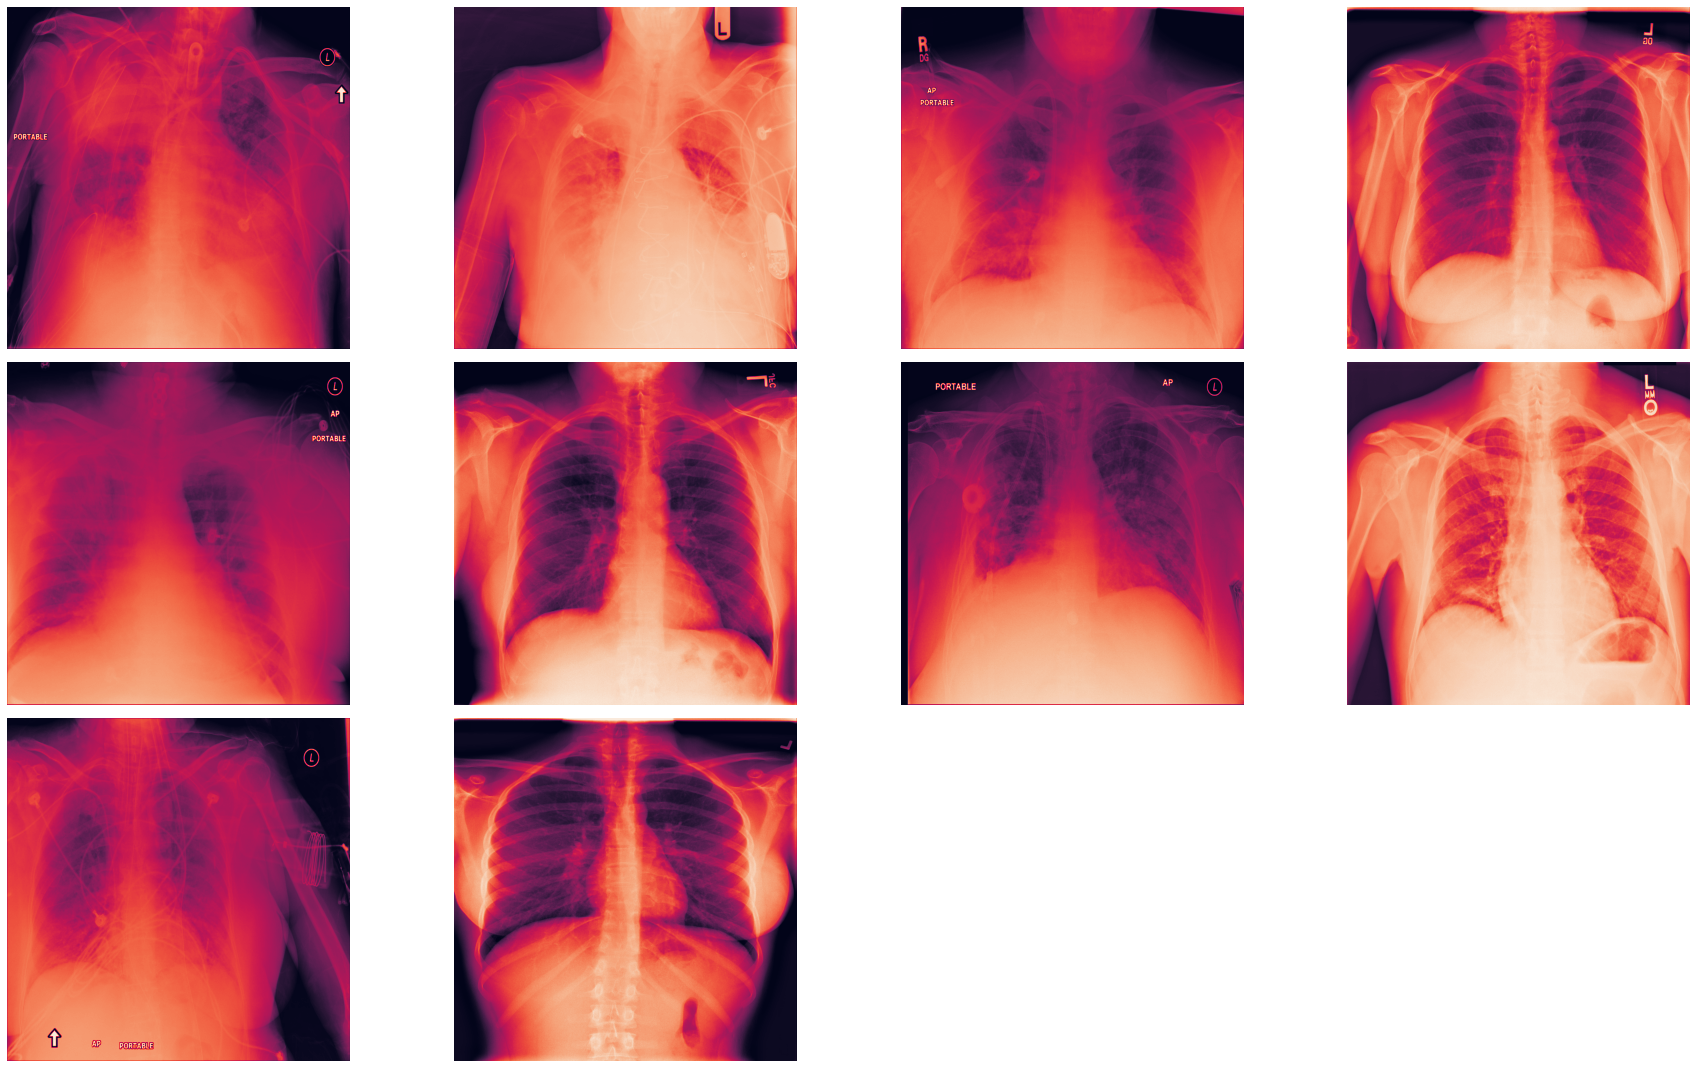

In [15]:
img_dir = '/content/drive/My Drive/new/nih/images-small'

print("Display random images")

plt.figure(figsize=(25,15))

for i in range(10):
    plt.subplot(3, 4, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img)
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


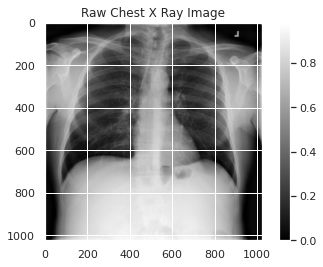

In [16]:
sample_img= train_df["Image"][0]

img= plt.imread(os.path.join(img_dir,sample_img))
plt.imshow(img, cmap="gray")
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {img.shape[0]} pixels width and {img.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {img.max():.4f} and the minimum is {img.min():.4f}")
print(f"The mean value of the pixels is {img.mean():.4f} and the standard deviation is {img.std():.4f}")

In [17]:
img.shape

(1024, 1024)

Text(0.5, 0, 'intensity')

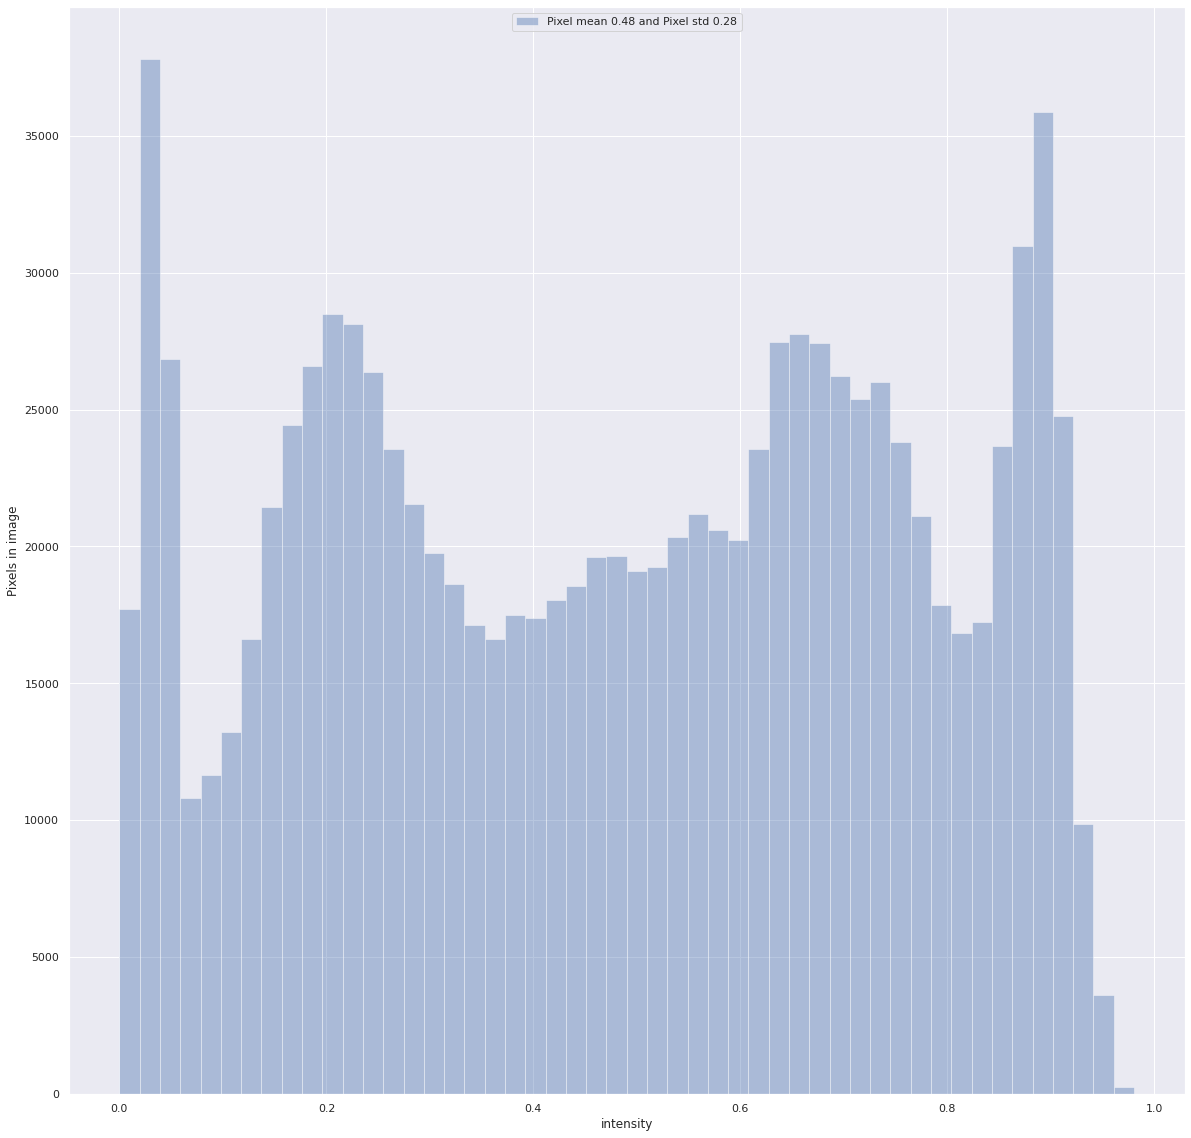

In [18]:
plt.figure(figsize=(20,20))
sns.distplot(img,label=f'Pixel mean {np.mean(img):.2f} and Pixel std {np.std(img):.2f}',kde=False)
plt.legend(loc='upper center')
plt.ylabel("Pixels in image")
plt.xlabel("intensity")

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# Normalize images
image_generator = ImageDataGenerator(
    samplewise_center=True, 
    samplewise_std_normalization= True
)

In [21]:
# Flow from directory with batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory="/content/drive/My Drive/new/nih/images-small",
        x_col="Image", # features
        y_col= ['Mass'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 1000 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.7999 and the minimum is -1.7404
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


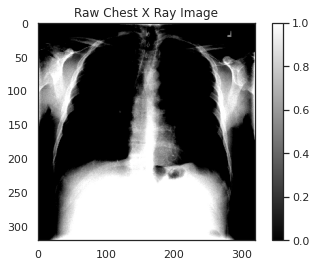

In [22]:
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

In [0]:
def check_for_leakage(df1, df2, patient_col):
    
    df1_patients_unique = set(df1[patient_col].values)
    df2_patients_unique = set(df2[patient_col].values)
    patients_in_both_groups = list(df1_patients_unique.intersection(df2_patients_unique)) 
    leakage = len(patients_in_both_groups) > 0 
    return leakage

In [0]:
valid_df = pd.read_csv("/content/drive/My Drive/new/nih/valid-small2.csv")
test_df = pd.read_csv("/content/drive/My Drive/new/nih/test2.csv")

In [25]:
print("leakage between train and test: {}".format(check_for_leakage(train_df, test_df, 'PatientId')))
print("leakage between valid and test: {}".format(check_for_leakage(valid_df, test_df, 'PatientId')))

leakage between train and test: False
leakage between valid and test: True


In [0]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
   
    print("getting train generator...") 
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with batch size and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h),validate_filenames=False)
    
    return generator

In [0]:
def get_test_and_valid_generator(valid_df, test_df, train_df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, seed=1, target_w = 320, target_h = 320):
   
    print("getting train and valid generators...")
    # get generator to sample dataset
    raw_train_generator = ImageDataGenerator().flow_from_dataframe(
        dataframe=train_df, 
        directory=IMAGE_DIR, 
        x_col="Image", 
        y_col=labels, 
        class_mode="raw", 
        batch_size=sample_size, 
        shuffle=True, 
        target_size=(target_w, target_h))
    
    # get data sample
    batch = raw_train_generator.next()
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)
    
    # fit generator to sample from training data
    image_generator.fit(data_sample)

    # get test generator
    valid_generator = image_generator.flow_from_dataframe(
            dataframe=valid_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))
    return valid_generator, test_generator

In [0]:
labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']

In [29]:
IMAGE_DIR = "/content/drive/My Drive/new/nih/images-small"
train_generator = get_train_generator(train_df, IMAGE_DIR, "Image", labels)
valid_generator, test_generator= get_test_and_valid_generator(valid_df, test_df, train_df, IMAGE_DIR, "Image", labels)

getting train generator...
Found 1000 non-validated image filenames.
getting train and valid generators...
Found 1000 validated image filenames.
Found 358 validated image filenames.
Found 61 validated image filenames.


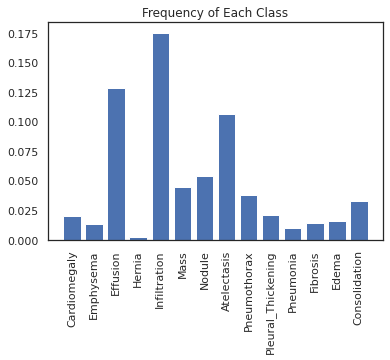

In [30]:
plt.xticks(rotation=90)
plt.bar(x=labels, height=np.mean(train_generator.labels, axis=0))
plt.title("Frequency of Each Class")
plt.show()

In [0]:
def compute_class_freqs(labels):
    
    # total number of patients
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels,axis=0) /N
    negative_frequencies = 1- positive_frequencies 

    return positive_frequencies, negative_frequencies

In [0]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)

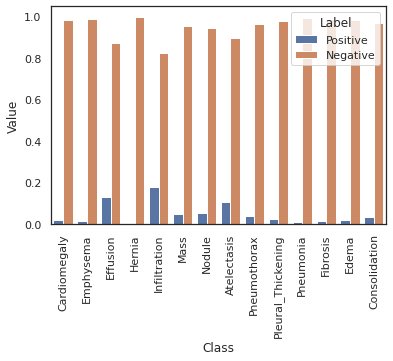

In [33]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} for l,v in enumerate(freq_neg)], ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [0]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

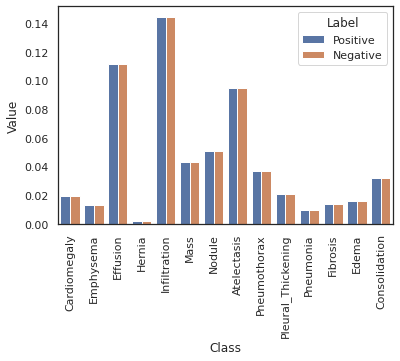

In [35]:
data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_contribution})
data = data.append([{"Class": labels[l], "Label": "Negative", "Value": v} 
                        for l,v in enumerate(neg_contribution)], ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);

In [0]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
   
    def weighted_loss(y_true, y_pred):
       
     
        loss = 0.0
        
        
        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class 
            loss += -(K.mean( pos_weights[i] * y_true[:,i] * K.log(y_pred[:,i] + epsilon) + neg_weights[i] * (1 - y_true[:,i]) * K.log(1 - y_pred[:,i] + epsilon), axis = 0))  #complete this line
        return loss
    
       
    return weighted_loss

In [0]:
base_model = DenseNet121(weights='/content/drive/My Drive/new/nih/densenet.hdf5', include_top=False)

x = base_model.output

# adding a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights))

Epoch 1/50
100/100 [==============================] - 42s 419ms/step - loss: 0.8502 - val_loss: 11.3765

Epoch 00001: val_loss improved from inf to 11.37647, saving model to file.h5
Epoch 2/50
100/100 [==============================] - 41s 407ms/step - loss: 0.8555 - val_loss: 5.0285

Epoch 00002: val_loss improved from 11.37647 to 5.02849, saving model to file.h5
Epoch 3/50
100/100 [==============================] - 41s 408ms/step - loss: 0.8270 - val_loss: 4.6843

Epoch 00003: val_loss improved from 5.02849 to 4.68426, saving model to file.h5
Epoch 4/50
100/100 [==============================] - 41s 412ms/step - loss: 0.8144 - val_loss: 1.7019

Epoch 00004: val_loss improved from 4.68426 to 1.70187, saving model to file.h5
Epoch 5/50
100/100 [==============================] - 41s 411ms/step - loss: 0.8356 - val_loss: 2.0634

Epoch 00005: val_loss did not improve from 1.70187
Epoch 6/50
100/100 [==============================] - 42s 419ms/step - loss: 0.8014 - val_loss: 2.7252

Epoch 

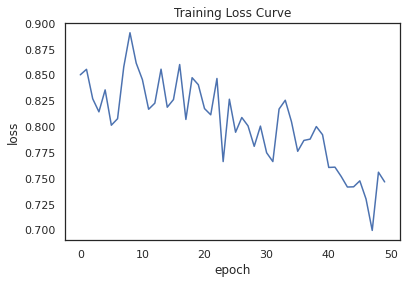

In [42]:
from keras.callbacks import ModelCheckpoint
best_model_file = "file.h5"
checkpoint = ModelCheckpoint(best_model_file,
                             monitor='val_loss', mode='min',verbose=1, save_best_only=True)

history = model.fit_generator(train_generator, 
                              validation_data=valid_generator,
                              steps_per_epoch=100, 
                              validation_steps=25, 
                              epochs = 50,callbacks=[checkpoint])

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

In [39]:
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

KeyError: ignored

In [0]:
model.load_weights("pretrained_model.h5")

In [0]:
predicted_vals = model.predict_generator(test_generator, steps = len(test_generator))

In [0]:
predicted_vals

array([[0.8141197 , 0.14665583, 0.7894406 , ..., 0.23597269, 0.8188064 ,
        0.67929006],
       [0.14887497, 0.20396732, 0.48113483, ..., 0.07114803, 0.54779786,
        0.6281806 ],
       [0.20625801, 0.31633762, 0.347174  , ..., 0.26303712, 0.38851437,
        0.36606675],
       ...,
       [0.0358012 , 0.35146847, 0.5020317 , ..., 0.64631724, 0.06389404,
        0.45119247],
       [0.23646495, 0.22899333, 0.392429  , ..., 0.45019266, 0.15224378,
        0.75269824],
       [0.14408584, 0.49577212, 0.9177121 , ..., 0.40758026, 0.12749414,
        0.6718483 ]], dtype=float32)